In [2014]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2016]:
df_house = pd.read_csv('London_houses.csv')

<h2>Processing the data</h2>

In [2019]:
df_house.drop(columns='no', inplace=True) #Removing the column from the index

In [2021]:
df_house

,property_name,price,house_type,sqft,bedrooms,bathrooms,receptions,location,city,postal_code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...
3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [2023]:
df_house['sqft'] = df_house['sqft'] / 10.76389999 # Converting the unit of measurement for houses from ft² to m² and changing the name of the column.
df_house.rename(columns={'sqft':'square_meters'}, inplace=True)

In [2025]:
df_house

,property_name,price,house_type,square_meters,bedrooms,bathrooms,receptions,location,city,postal_code
0,Queens Road,1675000,House,252.324901,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,75.623148,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,70.699282,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,184.505616,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,65.032191,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...
3475,One Lillie Square,3350000,New development,130.993413,3,3,3,NaN,Lillie Square,SW6 1UE
3476,St. James's Street,5275000,Flat / Apartment,162.487574,3,3,3,St James's,London,SW1A 1JT
3477,Ingram Avenue,5995000,House,412.025382,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,Cork Street,6300000,New development,139.912114,3,3,3,Mayfair,London,W1S 3AR


In [2027]:
df_house.isnull().sum()

property_name      0
price              0
house_type         0
square_meters      0
bedrooms           0
bathrooms          0
receptions         0
location         962
city               0
postal_code        0
dtype: int64

In [2029]:
df_house = df_house.fillna('no information') # Adjusting Nan values

In [2031]:
df_house.location.unique()

array(['Wimbledon', 'Clerkenwell', 'Putney', 'no information', ' Fulham',
       'Highgate', 'Walton-on-Thames', " St. John's Wood",
       '17 Abercorn Place', 'Regents Park', ' Coulsdon', 'Primrose Hill',
       'Marylebone', '10 Draycott Avenue', 'Islington', ' Islington',
       'South Hampstead', 'Belsize Park', 'Esher', ' Surbiton',
       '20-21 Wetherby Gardens', 'Chiswick', 'Barnes', 'Fulham',
       ' Battersea', ' Victoria', 'South Hackney', 'Grove End Road',
       'Crouch End', ' Downs Road', 'Coleridge Gardens', 'Battersea',
       'Chelsea Harbour', ' Bayswater', 'Tooting', 'Watford', 'Northwood',
       'Morgan Street', "Regent's Park", 'Kentish Town', "St John's Wood",
       ' Ealing', 'Thames Ditton', 'Kidbrooke', 'Westminster', 'Hackney',
       ' Canary Wharf', 'Woodford Green', ' Westminster', 'Surbiton',
       'Little Venice', 'Hampstead', ' Hampstead', "St. James's",
       '410 Strand', 'Loughton', 'Barnsbury', 'Prince of Wales Drive',
       'Wandsworth', '13

In [2248]:
# Adjusting duplicate values because of space, python understands that they are different locations
duplicate_values = df_house[df_house.location.str.contains(r'^\s')].location.unique()

for l in duplicate_values:
    
 df_house['location'] = df_house['location'].replace({l: l.strip()})


In [2034]:
df_house.location.unique()

array(['Wimbledon', 'Clerkenwell', 'Putney', 'no information', 'Fulham',
       'Highgate', 'Walton-on-Thames', "St. John's Wood",
       '17 Abercorn Place', 'Regents Park', 'Coulsdon', 'Primrose Hill',
       'Marylebone', '10 Draycott Avenue', 'Islington', 'South Hampstead',
       'Belsize Park', 'Esher', 'Surbiton', '20-21 Wetherby Gardens',
       'Chiswick', 'Barnes', 'Battersea', 'Victoria', 'South Hackney',
       'Grove End Road', 'Crouch End', 'Downs Road', 'Coleridge Gardens',
       'Chelsea Harbour', 'Bayswater', 'Tooting', 'Watford', 'Northwood',
       'Morgan Street', "Regent's Park", 'Kentish Town', "St John's Wood",
       'Ealing', 'Thames Ditton', 'Kidbrooke', 'Westminster', 'Hackney',
       'Canary Wharf', 'Woodford Green', 'Little Venice', 'Hampstead',
       "St. James's", '410 Strand', 'Loughton', 'Barnsbury',
       'Prince of Wales Drive', 'Wandsworth', '131 Ladbroke Grove',
       'City Of London', 'South Bank', 'The Otto Buildings',
       'Woodstock Road'

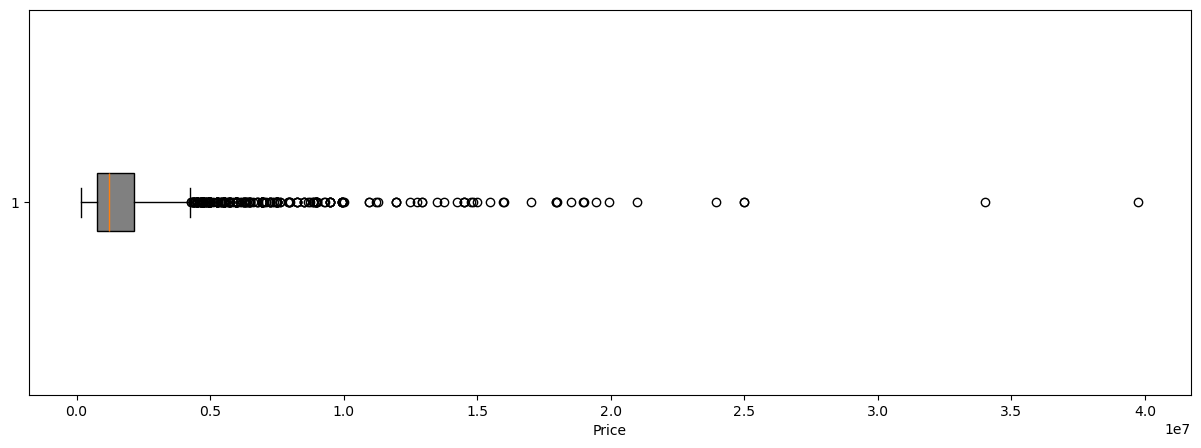

In [2310]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.boxplot(df_house.price, vert=False, patch_artist=True,boxprops=dict(facecolor='gray', color='black'))
ax.set_xlabel('Price')
plt.show()

<h2>Distribution of house prices</h2>

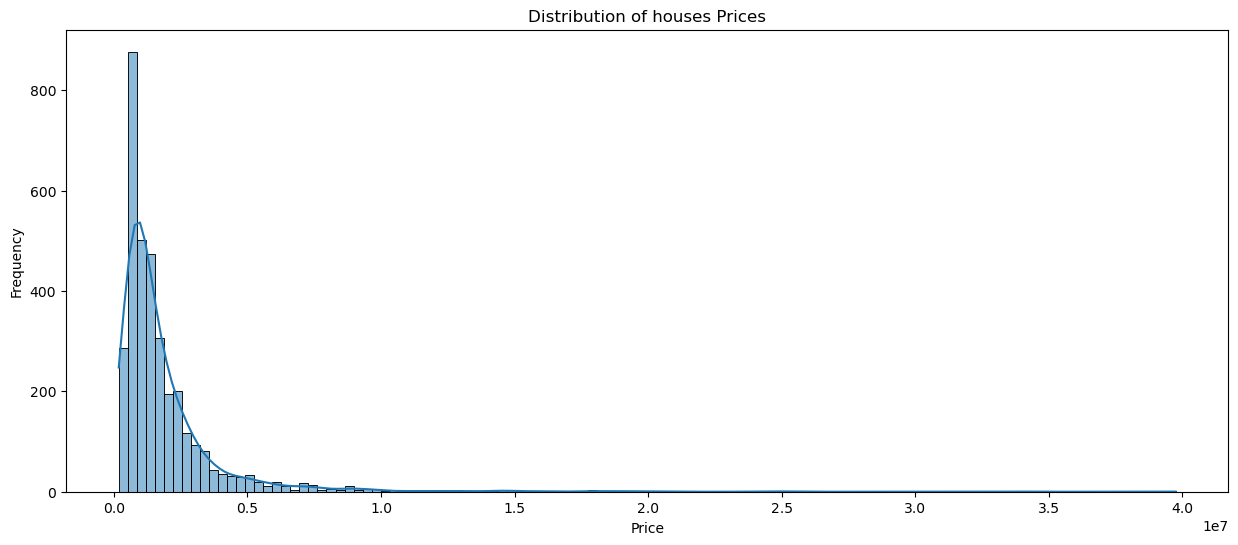

In [2302]:
bins = int(2 * np.sqrt(3480)) # Used Rice's rule to determine the class number
plt.figure(figsize=(15, 6))
sns.histplot(df_house['price'] , bins= bins, kde=True)
plt.title('Distribution of houses Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

<p>There are many discrepant values ​​in property prices, to better understand who buys, let's disregard properties purchased for more than £1,500.00, and look more at properties priced below this value, the price that approximately 60% of people in London buy their properties.</p>

In [2042]:
df_house_ = df_house[df_house.price < 1_500_000] 

In [2043]:
df_house_

,property_name,price,house_type,square_meters,bedrooms,bathrooms,receptions,location,city,postal_code
1,Seward Street,650000,Flat / Apartment,75.623148,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,70.699282,2,2,2,Putney,London,SW15 1QL
4,Spencer Walk,675000,Flat / Apartment,65.032191,2,2,2,Putney,London,SW15 1PL
5,Craven Hill Gardens,420000,Flat / Apartment,37.439961,1,1,1,no information,London,W2 3EA
6,Alfriston Road,1475000,House,143.814045,4,4,4,no information,London,SW11 6NW
...,...,...,...,...,...,...,...,...,...,...
3443,Rosemary Gate,950000,Flat / Apartment,107.210212,2,2,2,Esher,Surrey,KT10 9NZ
3445,Columbia Gardens North,1250000,New development,77.759920,2,2,2,no information,London,SW6 1FU
3447,Sharpleshall Street,1150000,Flat / Apartment,85.006364,3,3,3,Primrose Hill,London,NW1 8YN
3455,Berkeley Tower,950000,Flat / Apartment,123.282454,2,2,2,Canary Wharf,London,E14 8RP


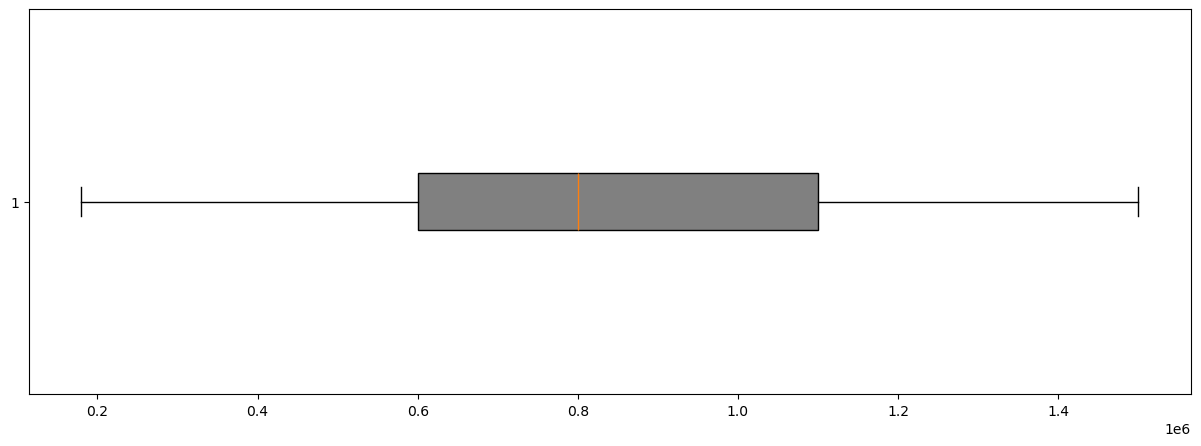

In [2288]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.boxplot(df_house_.price, vert=False, patch_artist=True, boxprops=dict(facecolor='gray', color='black'))
plt.show()

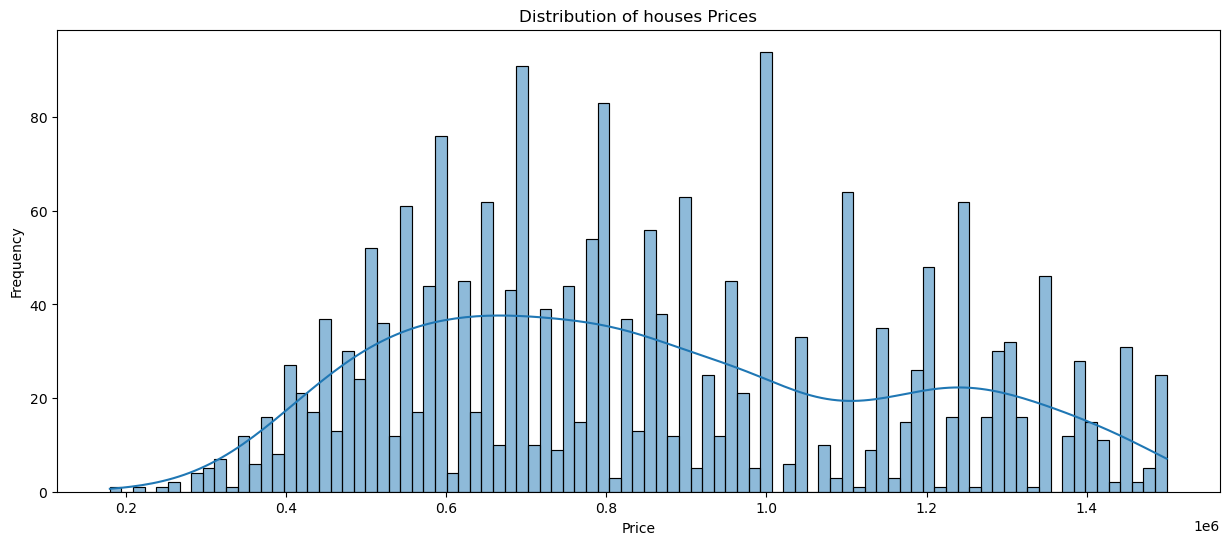

In [2049]:
bins = int(2 * np.sqrt(2091)) # Used Rice's rule to determine the class number
plt.figure(figsize=(15, 6))
sns.histplot(df_house_['price'] , bins= bins, kde=True)
plt.title('Distribution of houses Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<h2>Type of house they usually buy</h2>

In [2051]:
pd.DataFrame(df_house_.house_type.value_counts(normalize=True))

,proportion
house_type,
Flat / Apartment,0.593496
House,0.265423
New development,0.107126
Penthouse,0.021043
Studio,0.004782
Bungalow,0.004304
Duplex,0.002869
Mews,0.000956


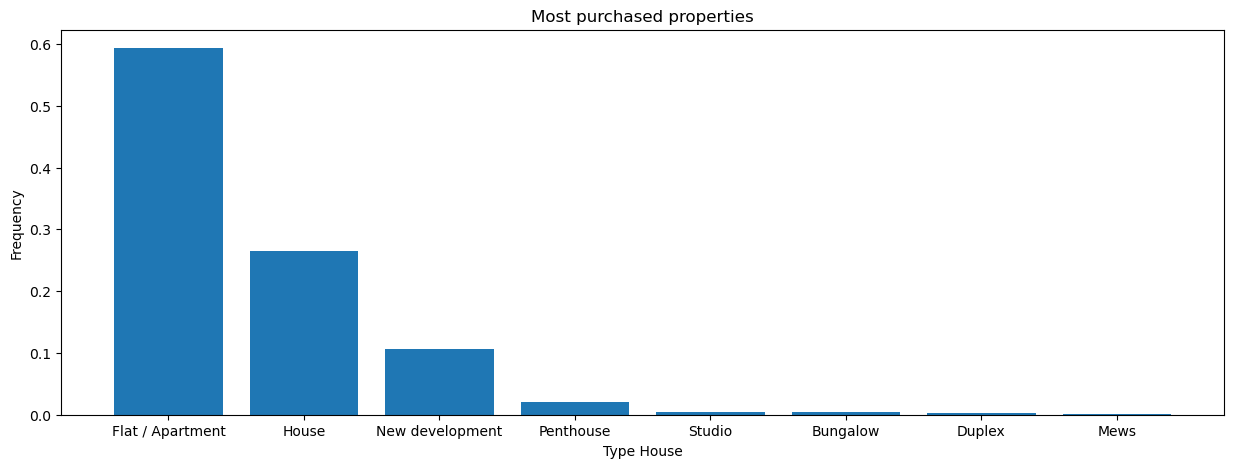

In [2318]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.bar(df_house_.house_type.value_counts().index, df_house_.house_type.value_counts(normalize=True))
ax.set_title('Most purchased properties')
ax.set_xlabel('Type House')
ax.set_ylabel('Frequency')
plt.show()

<p>The most purchased properties are residential properties, Flat/Apartment and Houses, with approximately 85%, commercial properties that are New Developments and Studio, with approximately 10.4%, and other types of residential properties, such as “luxurious” Penthouses and Duplexes in 2.2% and Mews at less than 1%, to better understand why people bought their properties, let's explore the people who bought residential properties, which are the best sellers.</p>

<h2>Explored the reason why people buy their properties</h2>

In [2058]:
df_house_residential = df_house_[(df_house_.house_type == 'Flat / Apartment') | (df_house_.house_type == 'House')]

<h3>Most popular cities</h3>

In [2061]:
pd.DataFrame(df_house_residential.city.value_counts(normalize=True)[:5])

,proportion
city,
London,0.862472
Surrey,0.064588
Essex,0.025056
Middlesex,0.023942
Hertfordshire,0.003898


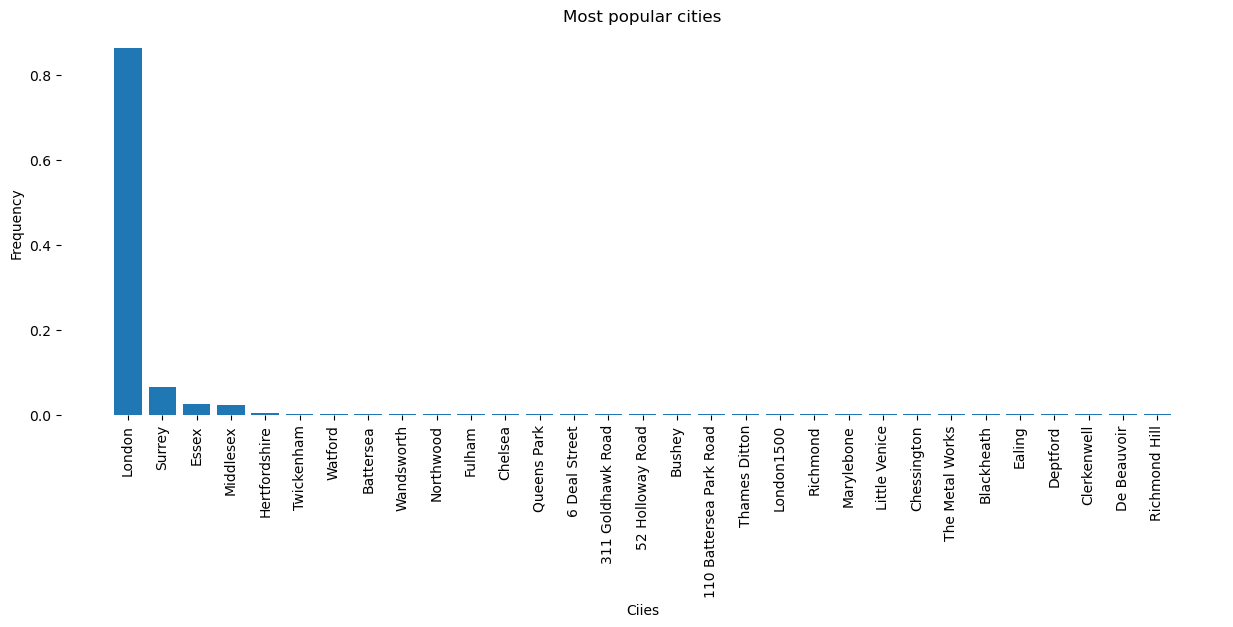

In [2324]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.bar(df_house_residential.city.value_counts().index, df_house_residential.city.value_counts(normalize=True))
plt.xticks(rotation=90)
ax.set_title('Most popular cities')
ax.set_xlabel('Ciies')
ax.set_ylabel('Frequency')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

In [2180]:
cities = df_house_residential.city.unique()
average_price = []
for c in cities:
    average_price.append(df_house_residential[df_house_residential.city == c].price.mean())


average_price_cities = pd.DataFrame({'city':cities,'average_price':average_price})

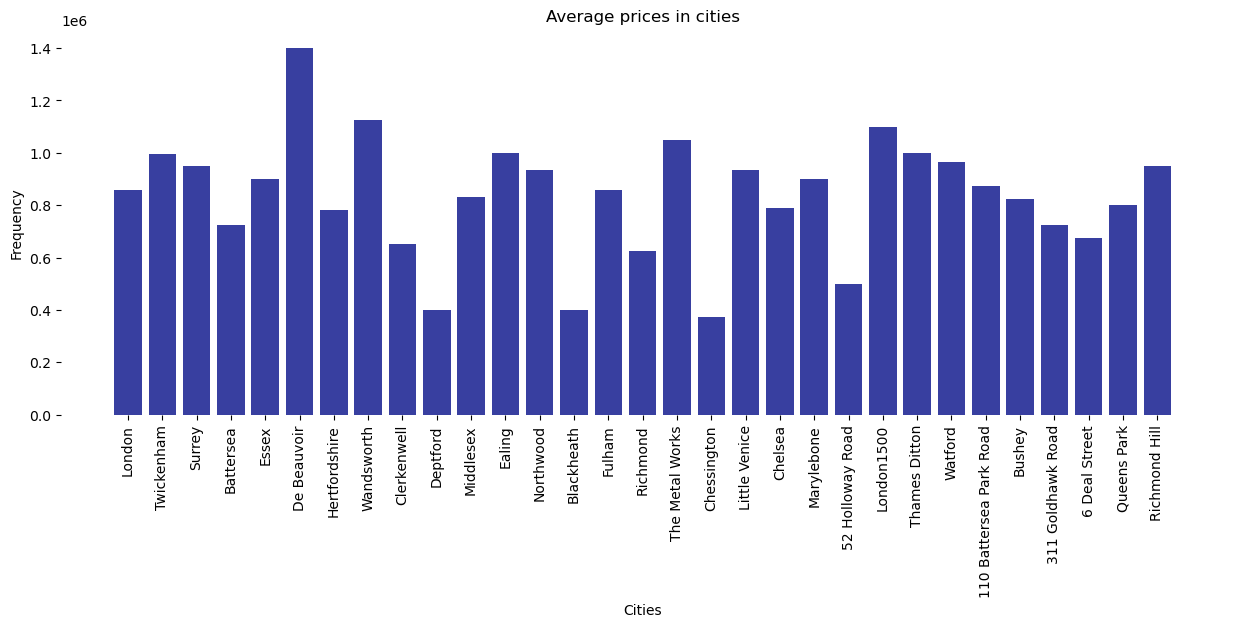

In [2354]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.bar(average_price_cities.city, average_price_cities.average_price,color='#383FA0')
ax.set_title('Average prices in cities')
ax.set_xlabel('Cities')
ax.set_ylabel('Frequency')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.xticks(rotation=90)
plt.show()

<p>Most people prefer to compare their properties in London, more than 85% live in London, while 15% are spread across cities in the region, as it has an attractive average price of houses and apartments and being the capital it is normal for it to be the first option. of those who are going to buy a property. Let's explore more about London.</p>

<h3>Most popular neighborhoods in London</h3>

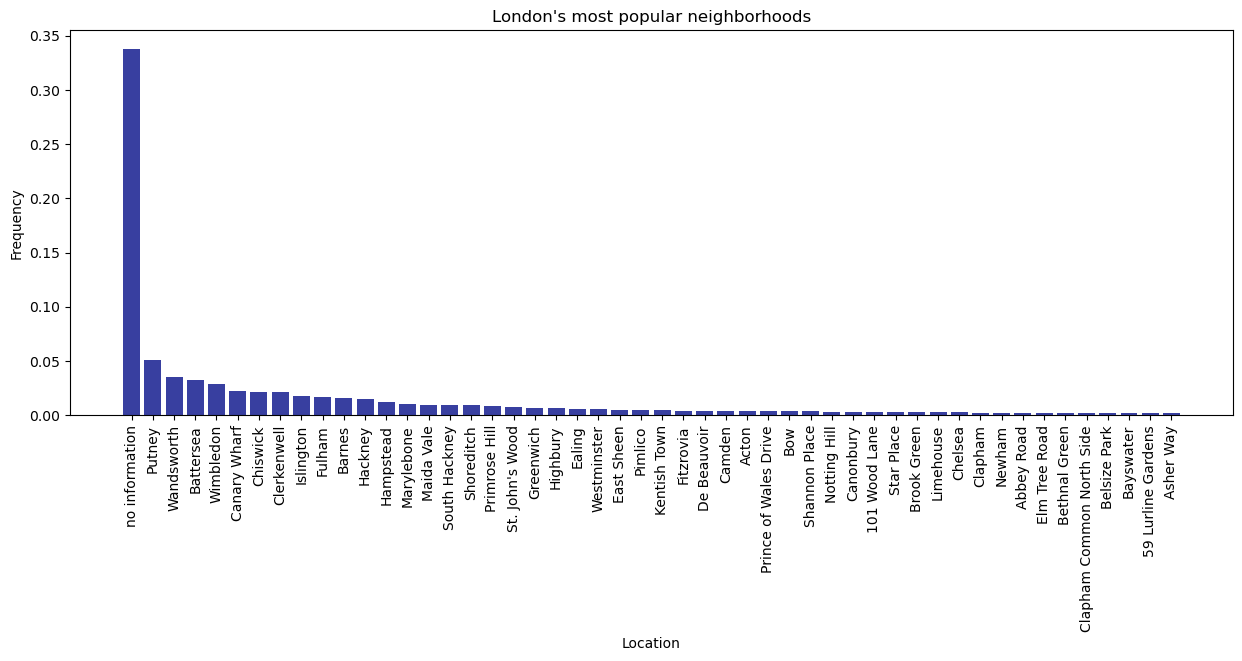

In [2352]:

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.bar(df_house_residential_london.location.value_counts()[:50].index, df_house_residential_london.location.value_counts(normalize=True)[:50],color='#383FA0')
ax.set_title("London's most popular neighborhoods")
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<p>With the exception of places where there was no location information, we will find out why these neighborhoods are so sought after when buying a property, analyzing prices, square meters, number of bedrooms, number of bathrooms, and everything that can influence the purchasing decision.</p>

<h2>Exploring property prices and sizes in London boroughs.</h2>

In [2217]:
Price_average = []
population = []
square_meters = []


for n in df_house_residential_london.location.unique():
    Price_average.append(round(df_house_residential_london[df_house_residential_london.location == n].price.mean(),2))
    population.append(df_house_residential_london[df_house_residential_london.location == n].shape[0]/df_house_residential_london.shape[0])
    square_meters.append(df_house_residential_london[df_house_residential_london.location == n].square_meters.mean())

frequency_neighborhoods = pd.DataFrame({'Neighborhoods': df_house_residential_london.location.unique(),
                                        'population': population,
                                        'square_meters': square_meters,
                                        'Price average':Price_average})
frequency_neighborhoods = frequency_neighborhoods.sort_values(by='population', ascending=False)
frequency_neighborhoods

,Neighborhoods,population,square_meters,Price average
2,no information,0.338283,96.569967,896271.79
1,Putney,0.051001,111.825969,886324.68
46,Wandsworth,0.034861,125.549978,966574.04
11,Battersea,0.032279,95.335334,834974.00
28,Wimbledon,0.028405,104.078954,845673.86
...,...,...,...,...
174,6 Wood Crescent,0.000646,99.127640,1425000.00
26,20 Love Lane,0.000646,71.907023,400000.00
176,22 Wapping High Street,0.000646,73.950891,999500.00
177,3 Forfar Road,0.000646,72.092829,625000.00


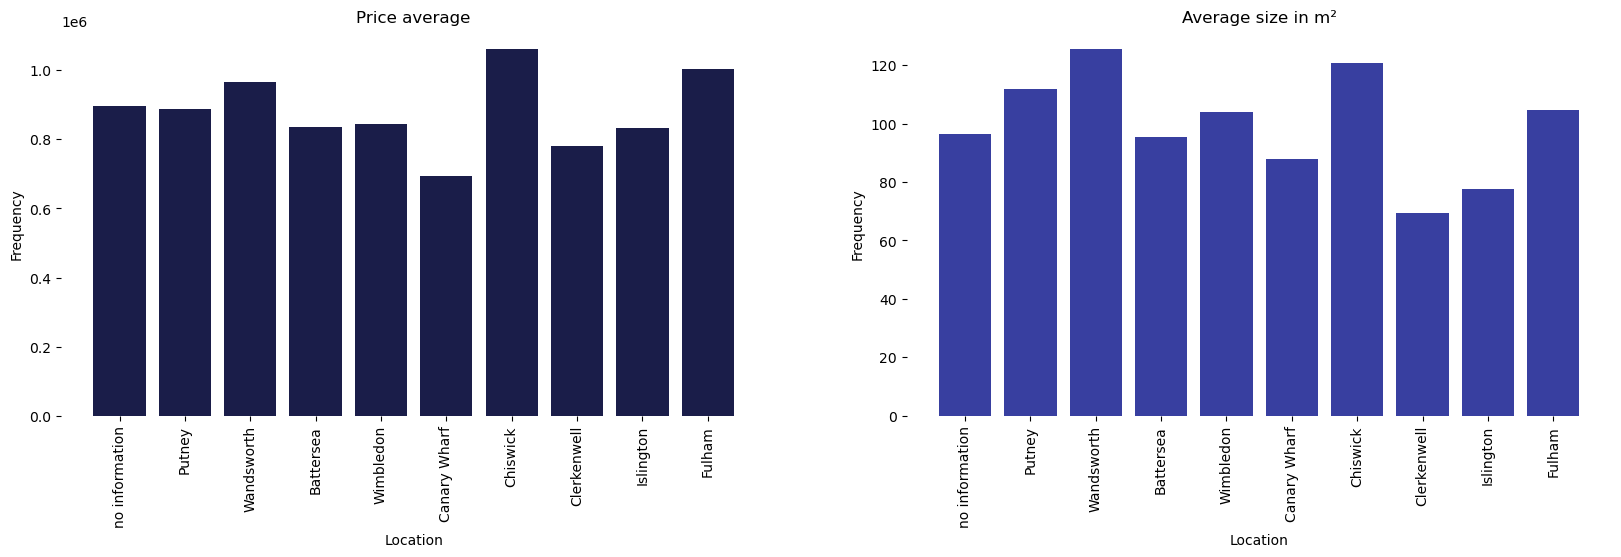

In [2350]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].bar(list(frequency_neighborhoods.Neighborhoods)[:10], list(frequency_neighborhoods['Price average'][0:10]), color='#1A1D49')
ax[1].bar(list(frequency_neighborhoods.Neighborhoods)[:10], list(frequency_neighborhoods['square_meters'][0:10]), color='#383FA0')

for a in ax:
    a.set_xticks(range(len(frequency_neighborhoods.Neighborhoods[:10]))) 
    a.set_xticklabels(list(frequency_neighborhoods.Neighborhoods)[:10],rotation=90)
    a.set_xlabel('Location')
    a.set_ylabel('Frequency')
    for spine in a.spines.values():
        spine.set_visible(False)
    
ax[0].set_title('Price average')
ax[1].set_title('Average size in m²')


   

plt.show()

<p>These are the "most populated" neighborhoods, and we see that the distribution of property prices and sizes are very equal, of course some neighborhoods are more expensive than others, but it's not a big deal, an advantage that these neighborhoods have is that some They are approximately within a 10km radius of the center.</p>

<h2>Distribution of houses and apartments</h2>

In [2242]:
houses = []
apartment = []
popular_places = frequency_neighborhoods.Neighborhoods[:10]

for n in popular_places:
    houses.append(df_house_residential_london[(df_house_residential_london.location == n) & (df_house_residential_london.house_type == 'House')].shape[0]/df_house_residential_london.shape[0])
    apartment.append(df_house_residential_london[(df_house_residential_london.location == n) & (df_house_residential_london.house_type == 'Flat / Apartment')].shape[0]/df_house_residential_london.shape[0])

frequency_apartment_houses = pd.DataFrame({'Location':popular_places,'House':houses, 'Flat / Apartment':apartment})


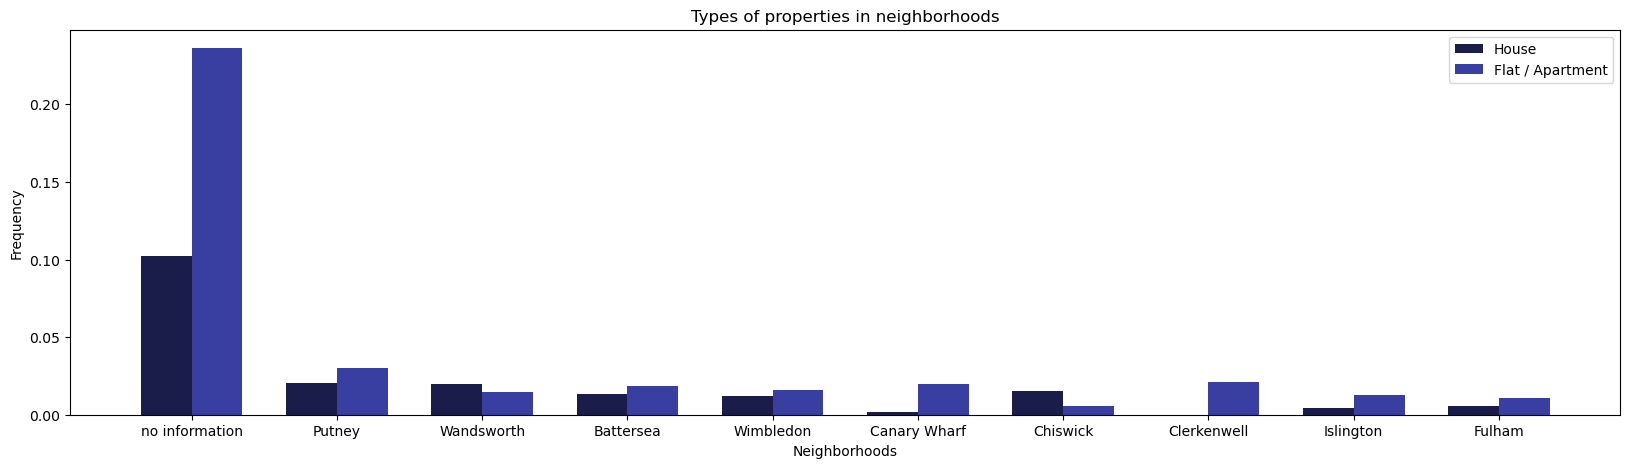

In [2346]:
labels = list(frequency_apartment_houses.Location)
valores_1 = list(frequency_apartment_houses.House)
valores_2 = list(frequency_apartment_houses['Flat / Apartment'])

x = np.arange(len(labels))  
largura = 0.35  

fig, ax = plt.subplots(1,1, figsize=(20,5))

barras1 = ax.bar(x - largura/2, valores_1, largura, label='House', color='#1A1D49')

barras2 = ax.bar(x + largura/2, valores_2, largura, label='Flat / Apartment', color='#383FA0')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Types of properties in neighborhoods')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

<p>We know that the most sought after property in London and throughout Greater London is apartments, apart from the neighborhood without information, which could be any, we see that in Chiswick and Wimbledon we have houses as the best-selling properties.</p>

<h2>Conclusion</h2>

<p>We conclude that when people decide to buy a property, whether residential or commercial, they will choose based on location and price, in what we analyzed, in the sample we saw more purchases of residential properties and the most sought after property are apartments, which are in the central areas of London which has the best prices.</p>